In [4]:
print(type(reboundxf.modify_elements()))

<class 'ctypes.CDLL.__init__.<locals>._FuncPtr'>


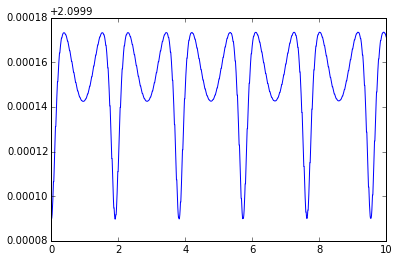

In [1]:
def test(a):
    pass

import rebound
import reboundxf
import numpy as np
sim = rebound.Simulation()
sim.force_is_velocity_dependent = 1
sim.G = 4.*(np.pi)**2
sim.integrator = 'whfast'
sim.dt = 0.012
sim.add(m=1.0)
sim.add(m=1.e-8, a=1.0, e=0.0, anom = 0)
sim.add(m=1.e-5, a=2.1**(2.0/3.0), e=0.0, anom = 0)
sim.move_to_com()

xf = reboundxf.Params(sim)
tmax = 1.e1
sim.additional_forces = reboundxf.modify_elements()
sim.post_timestep_modifications = reboundxf.modify_elements()
sim.post_timestep_modifications = test
sim.additional_forces = test
xf.e_damping_p = 1.
xf.tau_e = [0., 1.e5, 100.]
xf.tau_a = [0., 1.e10, 1.e7]
xf.tau_pomega = [0., 1.e5, 100.]

Nout = 1000
pratio = np.zeros(Nout)
a1 = np.zeros(Nout)
a2 = np.zeros(Nout)
e1 = np.zeros(Nout)
e2 = np.zeros(Nout)
po1 = np.zeros(Nout)
po2 = np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
ps = sim.particles
for i, time in enumerate(times):
    sim.integrate(time)
    o1 = ps[1].calculate_orbit(sim)
    o2 = ps[2].calculate_orbit(sim)
    a1[i] = o1.a
    a2[i] = o2.a
    e1[i] = o1.e
    e2[i] = o2.e
    po1[i] = o1.Omega + o1.omega
    po2[i] = o2.Omega + o2.omega
    pratio[i] = o2.P/o1.P
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times,pratio)